# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [3]:
library('tidyverse')

In [4]:
turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv')

turbine |> head()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

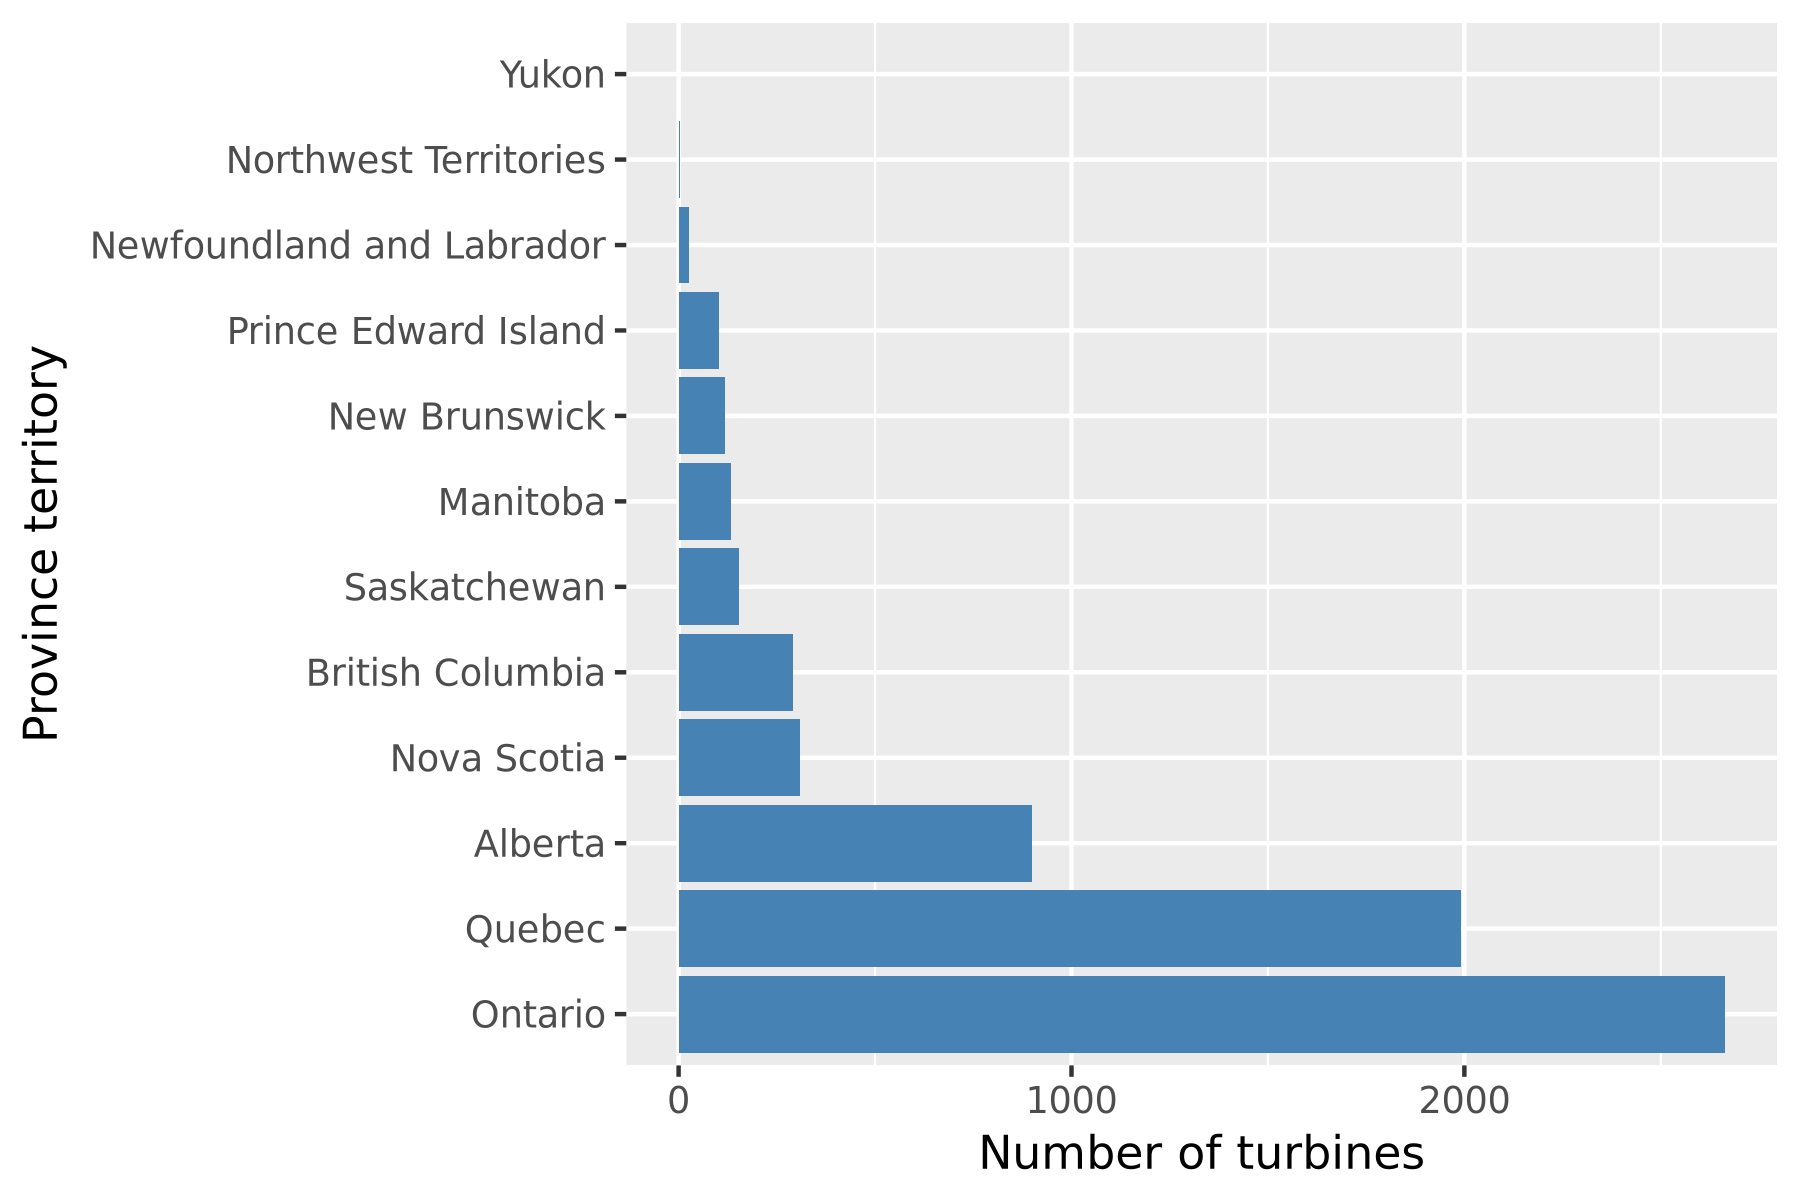

In [5]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

# Ascending order
turbine |>
    mutate(province_territory = fct_infreq(province_territory)) |>
ggplot(aes(y = province_territory)) + geom_bar(fill = 'steelblue') +
labs(x = 'Number of turbines', y = 'Province territory')

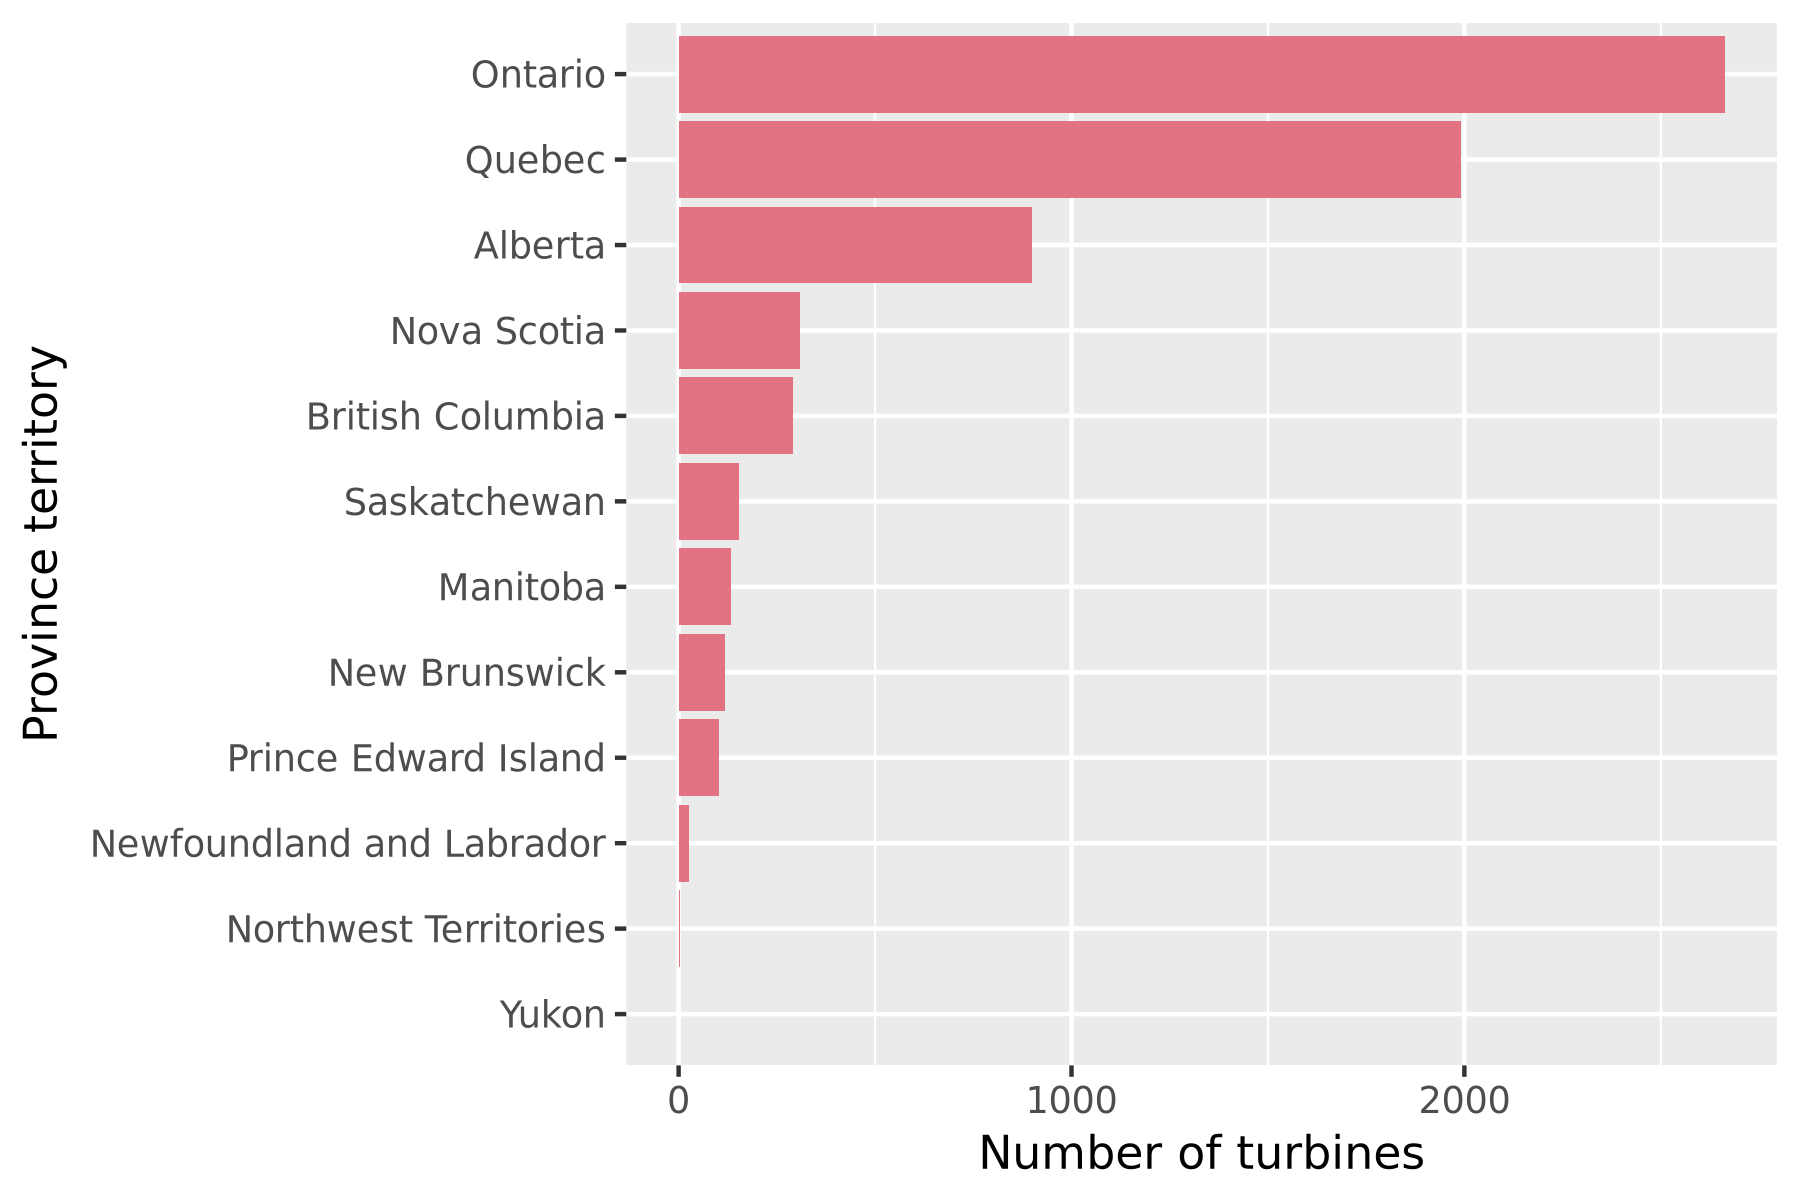

In [6]:
# Descending order
turbine |>
    mutate(province_territory = fct_infreq(province_territory) |> fct_rev()) |>
ggplot(aes(y = province_territory)) + geom_bar(fill = '#E37383') +
labs(x = 'Number of turbines', y = 'Province territory')

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [7]:
turbine|> 
    group_by(manufacturer) |>
    summarize(N = n())

manufacturer,N
<chr>,<int>
Acciona,34
Acciona Wind Power,40
Bonus,2
DeWind,5
EWT,2
Enercon,960
GE,1725
Gamesa,8
Lagerwey,2


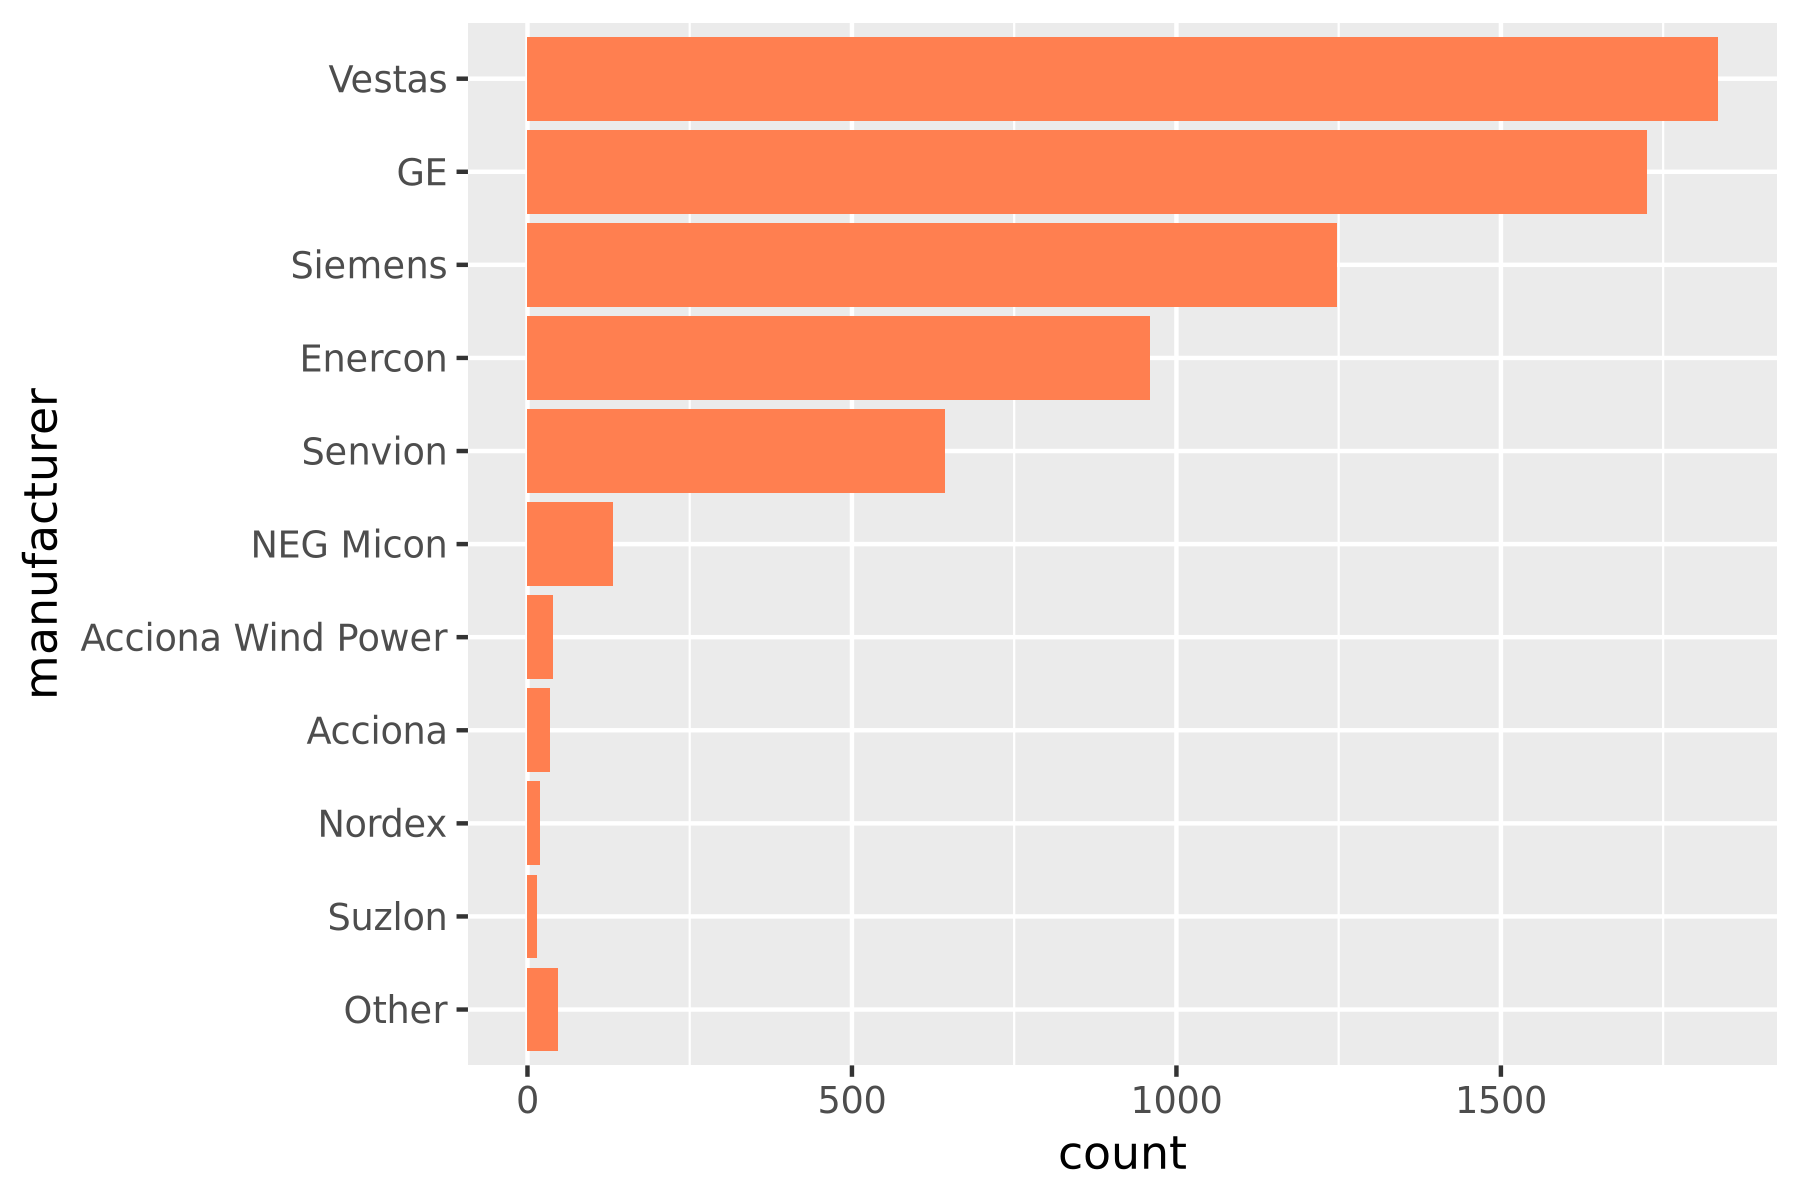

In [8]:
#there are about 13 low frequency manufacturers out of 23
#Keep the top 10 most frequent manufacturers and lump all others into a single "Other" category.
turbine |> 
    mutate(manufacturer = fct_lump(manufacturer, n =10) |> 
           fct_infreq() |>
           fct_relevel('Other', after = Inf) |> #force the `Other` category to be the last bar 
              fct_rev()) |>
ggplot(aes(y = manufacturer)) + geom_bar(fill = 'coral')

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [9]:
library("mapdata")

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [10]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [11]:
canada |> head()

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-59.78760,43.93960,1,1,Canada,Sable Island
2,-59.92227,43.90391,1,2,Canada,Sable Island
3,-60.03775,43.90664,1,3,Canada,Sable Island
4,-60.11426,43.93911,1,4,Canada,Sable Island
5,-60.11748,43.95337,1,5,Canada,Sable Island
6,-59.93604,43.93960,1,6,Canada,Sable Island


The column names for `latitude` and `longitude` are NOT the same for the Canada map data and the turbine data.

- The turbine data uses the words `latitude` and `longitude` in full
- The Canada map uses the abbreviations `lat` and `long`

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

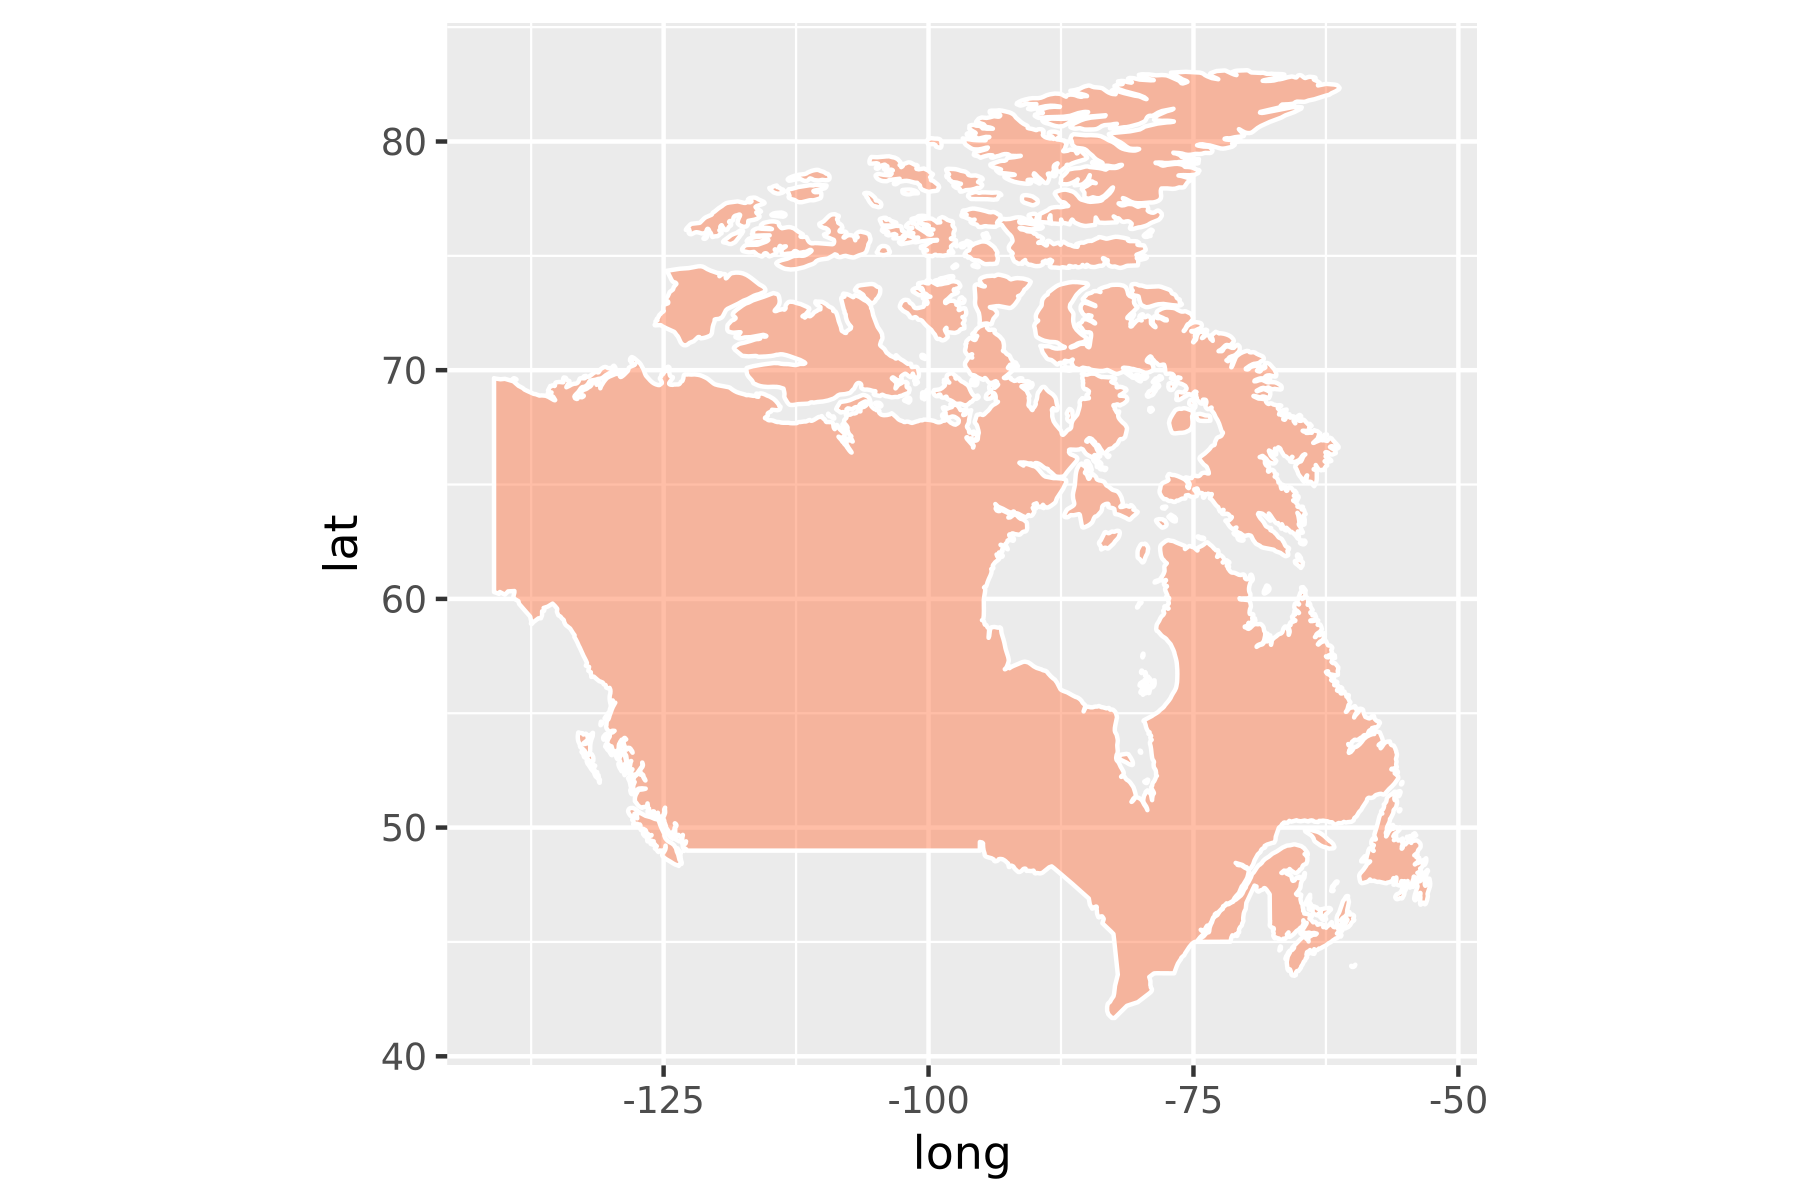

In [12]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap()

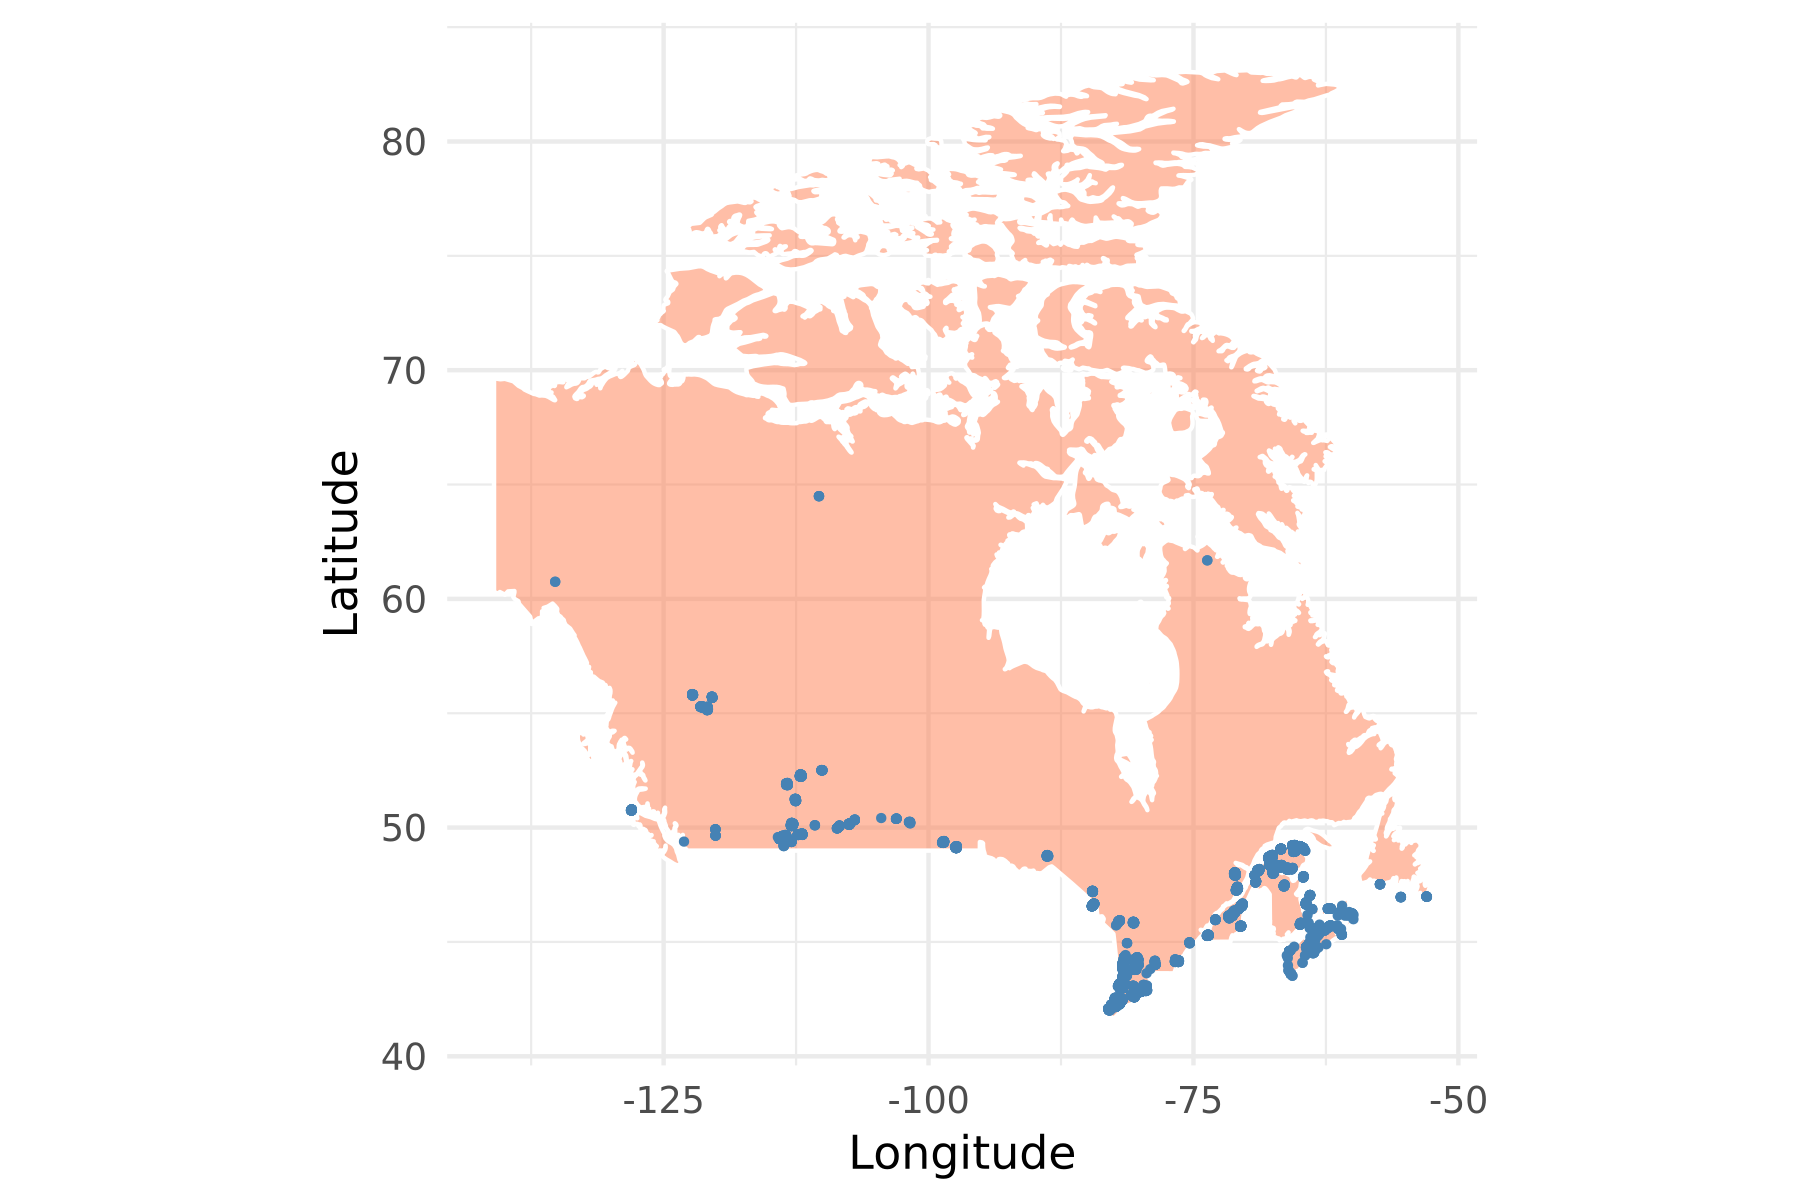

In [13]:
ggplot() + 
    geom_polygon(data = canada, aes(x = long, y = lat, group = group), 
                 fill = 'coral', color = "white", alpha = 0.5) +
    geom_point(data = turbine, aes(x = longitude, y = latitude), 
               color = 'steelblue', size = 0.5) +
    coord_quickmap() +
    labs(x = "Longitude", y = "Latitude") +
    theme_minimal() 